In [ ]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt

import nltk
from nltk.corpus import stopwords
from nltk import word_tokenize, pos_tag, ne_chunk

nltk.download("maxent_ne_chunker")
nltk.download("words")
nltk.download("averaged_perceptron_tagger")
nltk.download("punkt")
nltk.download("stopwords")
stop_words = set(stopwords.words("english"))


def is_noise(word):
    return (
        word.lower() in stop_words
        or word.isdigit()
        or re.match(r"^\W+$", word) is not None
        or re.match(r"[\U0001F600-\U0001F64F]", word) is not None
    )


def is_named_entity(token):
    tagged_token = pos_tag([token])
    chunk = ne_chunk(tagged_token)
    for subtree in chunk:
        if hasattr(subtree, "label"):
            return True
    return False

In [8]:
base = pd.read_csv('data/BABE/babe.csv').rename(columns={'Unnamed: 0':'token'})
magpie = pd.read_csv('data/BABE/magpie.csv').rename(columns={'Unnamed: 0':'token'})
synth = pd.read_csv('data/BABE/synth.csv').rename(columns={'Unnamed: 0':'token'})

# cast to strings (some tokens are numbers)
base['token'] = base['token'].astype(str)
magpie['token'] = magpie['token'].astype(str)
synth['token'] = synth['token'].astype(str)

# remove stopwords, numbers, emojis, etc.
base = base[~base["token"].apply(is_noise)]
magpie = magpie[~magpie["token"].apply(is_noise)]
synth = synth[~synth["token"].apply(is_noise)]

# only consider non-negative attributions 
magpie = magpie[magpie['attribution'] >= 0]
base = base[base['attribution'] >= 0]
synth = synth[synth['attribution'] >= 0]


### average attributions to Named Entities

In [21]:
def get_percentage_of_NER_attributions(df):
    ner_attributions = df[df['token'].apply(is_named_entity)]['attribution'].sum()
    all_attributions = df['attribution'].sum()
    return ner_attributions/all_attributions

In [24]:
get_percentage_of_NER_attributions(synth)

0.09785730346662938

base attribution:  0.11847788212482634
magpie attribution:  0.06218049519729795
synth attribution:  0.08675489275717088


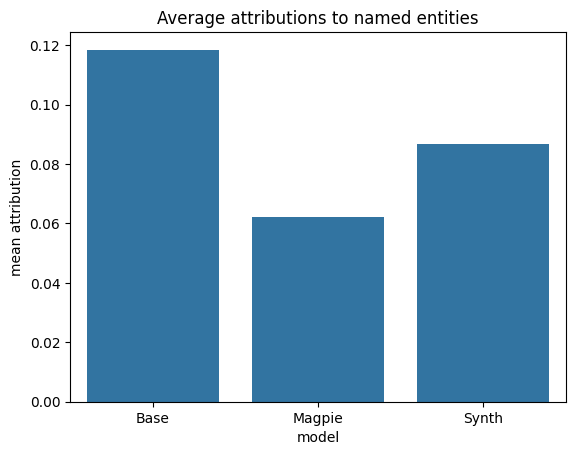

In [17]:
magpie_mean = magpie[magpie['token'].apply(is_named_entity)]['attribution'].mean()
base_mean = base[base['token'].apply(is_named_entity)]['attribution'].mean()
synth_mean = synth[synth['token'].apply(is_named_entity)]['attribution'].mean()

data = pd.DataFrame({
    'model': ['Base', 'Magpie', 'Synth'],
    'mean Attribution': [base_mean, magpie_mean, synth_mean]
})
sns.barplot(x='model', y='mean Attribution', data=data)

plt.xlabel('model')  # Label for x-axis
plt.ylabel('mean attribution')  # Label for y-axis
plt.title('Average attributions to named entities')  # Optional: Add a title


print("base attribution: ",base_mean)
print("magpie attribution: ",magpie_mean)
print("synth attribution: ",synth_mean)